In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

import pathlib
import os
import cv2 as cv

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from skimage import exposure
import sys

import random
import shutil
import seaborn as sns

import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers
# from tensorflow.keras.utils import np_utils
from sklearn import metrics
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
# tf.enable_eager_execution()

print(tf.__version__)
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2.6.4


> **Load Dataset**

In [2]:
train_data = pathlib.Path('/kaggle/input/breast-moz/Dataset_BUSI_with_GT/train')
test_data = pathlib.Path('/kaggle/input/breast-moz/Dataset_BUSI_with_GT/test')
peso= pathlib.Path('/kaggle/working/')
print(train_data)


/kaggle/input/breast-moz/Dataset_BUSI_with_GT/train


In [3]:
IMAGE_SIZE = 256
Nomes = ['Benign', 'Malign', 'Normal']
i0 = 0
i1 = 0
i2 = 0
i3 = 0

num_class = 3

epoch = 80
loss_function = "sparse_categorical_crossentropy"
optimizer = Adam(learning_rate=0.001)
num_folds = 10
batchsize = 32

# container for metrics
acc_folds = []
f1_folds = []
prec_folds = []
recall_folds = []

In [4]:
def load_data(data_directory):
  
    directories = [d for d in os.listdir(data_directory)
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    file_names = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names += [os.path.join(label_directory, f)
                       for f in os.listdir(label_directory)]
                       
    random.shuffle(file_names)

    for f in file_names:
        #print(f)
        img = cv.imread(f)
        img = cv.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        dirname = os.path.split(os.path.dirname(f))[1]

        images.append(img)
        labels.append(int(dirname))

    images, labels = np.asarray(images), np.asarray(labels)
    images = images.astype('float32') / float(255)

    return images, labels

In [5]:
imagens, labels = load_data(train_data)

# **Data analizes**

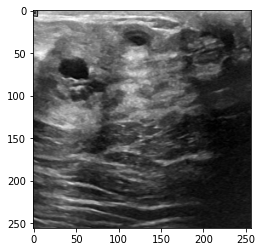

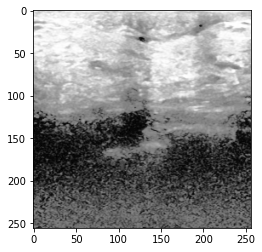

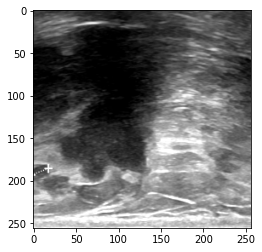

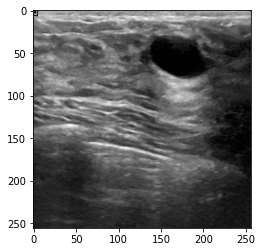

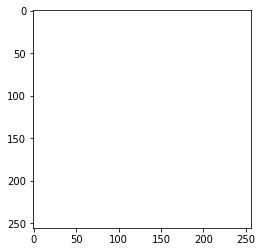

In [6]:
imagens.shape
for x in range(0,5):
  plt.figure()
  plt.imshow(imagens[x])
  plt.show()

> **Split dataset**

1. A seguir o modelo eh treinado usando a tecnica de cross fold validation K-fold onde K=10.
2. O dataset eh devido em 10 subdataset e cada subdataset eh devido em traino e test
3. O desempenho em cada subdataset eh guardado
4. No final o desempenho final do modelo eh a media do desempenho em todos os 10 subdataset. 
5. Depois calculamos o desvio padrao e o intervalo de confianca sobre o desempenho do nossso modelo. 

NB: O modelo abaixo usa 

(1350, 256, 256, 3)
(1350,)


2023-01-19 10:12:49.408329: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 10:12:49.509312: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 10:12:49.510561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 10:12:49.517876: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/80


2023-01-19 10:12:59.692983: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


43/43 [==============================] - 35s 537ms/step - loss: 0.8838 - accuracy: 0.5852 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/80
43/43 [==============================] - 21s 496ms/step - loss: 0.7561 - accuracy: 0.6385 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 3/80
43/43 [==============================] - 21s 497ms/step - loss: 0.6390 - accuracy: 0.7126 - val_loss: 1.0998 - val_accuracy: 0.3333
Epoch 4/80
43/43 [==============================] - 21s 497ms/step - loss: 0.5411 - accuracy: 0.7785 - val_loss: 1.1032 - val_accuracy: 0.3333
Epoch 5/80
43/43 [==============================] - 21s 497ms/step - loss: 0.4903 - accuracy: 0.8067 - val_loss: 1.1083 - val_accuracy: 0.3333
Epoch 6/80
43/43 [==============================] - 21s 495ms/step - loss: 0.4293 - accuracy: 0.8244 - val_loss: 1.1267 - val_accuracy: 0.3333
Epoch 7/80
43/43 [==============================] - 21s 496ms/step - loss: 0.3553 - accuracy: 0.8652 - val_loss: 1.1382 - val_accuracy: 0.3333
Epoch 8/80

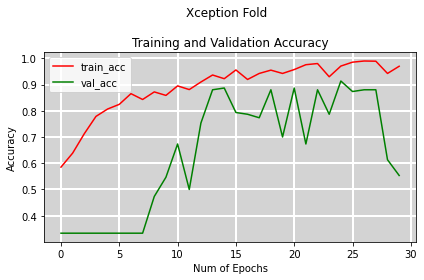

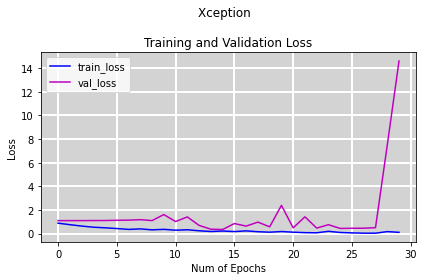

(1350, 256, 256, 3)
(1350,)


2023-01-19 10:23:50.364745: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1061683200 exceeds 10% of free system memory.
2023-01-19 10:23:51.514284: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1061683200 exceeds 10% of free system memory.


Epoch 1/80
43/43 [==============================] - 26s 517ms/step - loss: 1.4102 - accuracy: 0.4874 - val_loss: 1.2430 - val_accuracy: 0.4400
Epoch 2/80
43/43 [==============================] - 21s 496ms/step - loss: 0.8686 - accuracy: 0.5837 - val_loss: 1.2003 - val_accuracy: 0.3333
Epoch 3/80
43/43 [==============================] - 21s 496ms/step - loss: 0.8118 - accuracy: 0.6052 - val_loss: 1.1619 - val_accuracy: 0.3333
Epoch 4/80
43/43 [==============================] - 21s 495ms/step - loss: 0.7799 - accuracy: 0.5978 - val_loss: 1.3008 - val_accuracy: 0.3800
Epoch 5/80
43/43 [==============================] - 21s 495ms/step - loss: 0.7669 - accuracy: 0.6489 - val_loss: 1.8606 - val_accuracy: 0.3333
Epoch 6/80
43/43 [==============================] - 21s 495ms/step - loss: 0.6904 - accuracy: 0.6881 - val_loss: 1.1266 - val_accuracy: 0.3133
Epoch 7/80
43/43 [==============================] - 21s 494ms/step - loss: 0.6637 - accuracy: 0.6926 - val_loss: 1.3775 - val_accuracy: 0.3667

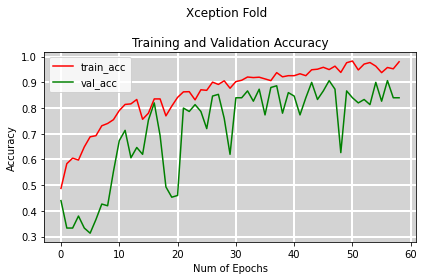

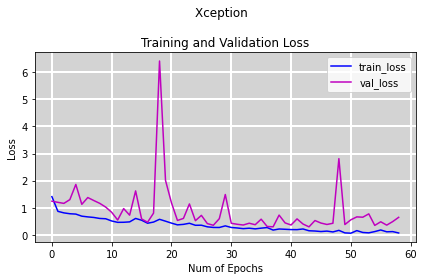

(1350, 256, 256, 3)
(1350,)


2023-01-19 10:45:20.627427: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1061683200 exceeds 10% of free system memory.


Epoch 1/80
43/43 [==============================] - 26s 518ms/step - loss: 1.6124 - accuracy: 0.4230 - val_loss: 35.3360 - val_accuracy: 0.3333
Epoch 2/80
43/43 [==============================] - 21s 497ms/step - loss: 0.9923 - accuracy: 0.5000 - val_loss: 1.1449 - val_accuracy: 0.3867
Epoch 3/80
43/43 [==============================] - 21s 494ms/step - loss: 0.9590 - accuracy: 0.5215 - val_loss: 1.1554 - val_accuracy: 0.3333
Epoch 4/80
43/43 [==============================] - 21s 497ms/step - loss: 0.8505 - accuracy: 0.5578 - val_loss: 1.1212 - val_accuracy: 0.3333
Epoch 5/80
43/43 [==============================] - 21s 498ms/step - loss: 0.7976 - accuracy: 0.5948 - val_loss: 1.1592 - val_accuracy: 0.3333
Epoch 6/80
43/43 [==============================] - 21s 494ms/step - loss: 0.7293 - accuracy: 0.6415 - val_loss: 1.1070 - val_accuracy: 0.3733
Epoch 7/80
43/43 [==============================] - 21s 500ms/step - loss: 0.7307 - accuracy: 0.6252 - val_loss: 1.4604 - val_accuracy: 0.313

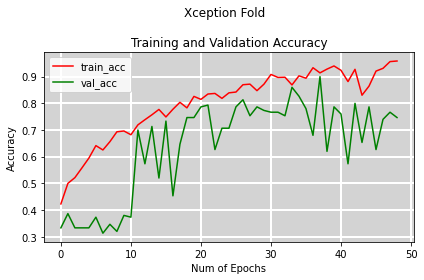

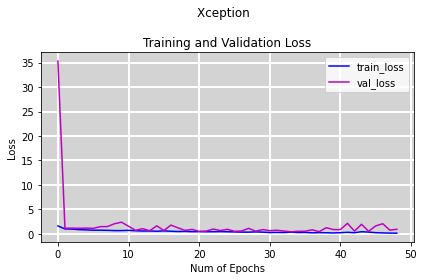

(1350, 256, 256, 3)
(1350,)
Epoch 1/80
43/43 [==============================] - 26s 517ms/step - loss: 2.1269 - accuracy: 0.3948 - val_loss: 1035417.1875 - val_accuracy: 0.3333
Epoch 2/80
43/43 [==============================] - 21s 496ms/step - loss: 1.2421 - accuracy: 0.4556 - val_loss: 978.0964 - val_accuracy: 0.2267
Epoch 3/80
43/43 [==============================] - 21s 496ms/step - loss: 1.1100 - accuracy: 0.4607 - val_loss: 102.0853 - val_accuracy: 0.3533
Epoch 4/80
43/43 [==============================] - 21s 496ms/step - loss: 0.9822 - accuracy: 0.4800 - val_loss: 3.9281 - val_accuracy: 0.3667
Epoch 5/80
43/43 [==============================] - 21s 499ms/step - loss: 0.9438 - accuracy: 0.5444 - val_loss: 6.1279 - val_accuracy: 0.3133
Epoch 6/80
43/43 [==============================] - 21s 494ms/step - loss: 0.8927 - accuracy: 0.5563 - val_loss: 27.6372 - val_accuracy: 0.3000
Epoch 7/80
43/43 [==============================] - 21s 496ms/step - loss: 0.7942 - accuracy: 0.5889 - 

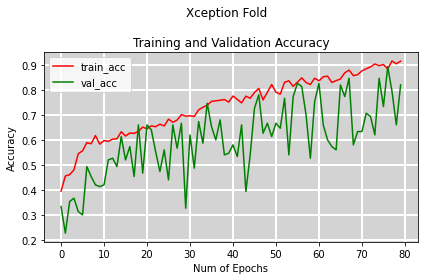

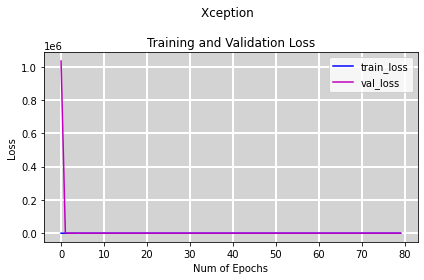

(1350, 256, 256, 3)
(1350,)
Epoch 1/80
43/43 [==============================] - 26s 517ms/step - loss: 1.4964 - accuracy: 0.4659 - val_loss: 132.8528 - val_accuracy: 0.3333
Epoch 2/80
43/43 [==============================] - 21s 499ms/step - loss: 0.9581 - accuracy: 0.5304 - val_loss: 1.3525 - val_accuracy: 0.3933
Epoch 3/80
43/43 [==============================] - 21s 495ms/step - loss: 0.8564 - accuracy: 0.5852 - val_loss: 1.4715 - val_accuracy: 0.3333
Epoch 4/80
43/43 [==============================] - 21s 495ms/step - loss: 0.8060 - accuracy: 0.5985 - val_loss: 1.7033 - val_accuracy: 0.3333
Epoch 5/80
43/43 [==============================] - 21s 495ms/step - loss: 0.7910 - accuracy: 0.5956 - val_loss: 1.1793 - val_accuracy: 0.2867
Epoch 6/80
43/43 [==============================] - 21s 493ms/step - loss: 0.7636 - accuracy: 0.6348 - val_loss: 1.4783 - val_accuracy: 0.4067
Epoch 7/80
43/43 [==============================] - 21s 494ms/step - loss: 0.8244 - accuracy: 0.6030 - val_loss:

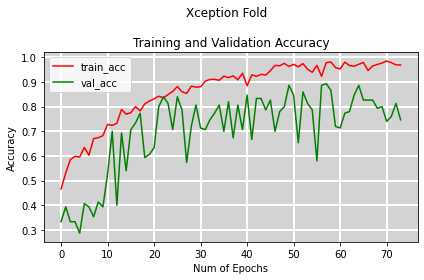

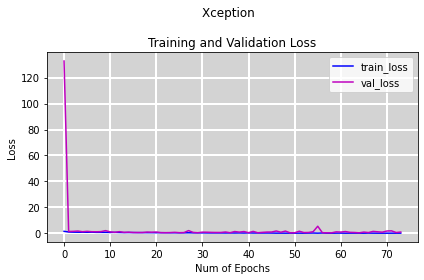

(1350, 256, 256, 3)
(1350,)
Epoch 1/80
43/43 [==============================] - 26s 517ms/step - loss: 2.0502 - accuracy: 0.3822 - val_loss: 884789.1250 - val_accuracy: 0.2333
Epoch 2/80
43/43 [==============================] - 21s 497ms/step - loss: 1.1946 - accuracy: 0.4511 - val_loss: 15.1793 - val_accuracy: 0.3333
Epoch 3/80
43/43 [==============================] - 21s 496ms/step - loss: 1.1311 - accuracy: 0.4200 - val_loss: 24.9040 - val_accuracy: 0.3533
Epoch 4/80
43/43 [==============================] - 21s 496ms/step - loss: 1.1018 - accuracy: 0.4311 - val_loss: 2.5098 - val_accuracy: 0.2867
Epoch 5/80
43/43 [==============================] - 21s 497ms/step - loss: 1.0326 - accuracy: 0.4689 - val_loss: 1.0921 - val_accuracy: 0.4200
Epoch 6/80
43/43 [==============================] - 21s 498ms/step - loss: 1.0306 - accuracy: 0.4644 - val_loss: 96.4334 - val_accuracy: 0.2333
Epoch 7/80
43/43 [==============================] - 21s 496ms/step - loss: 0.9865 - accuracy: 0.5030 - val

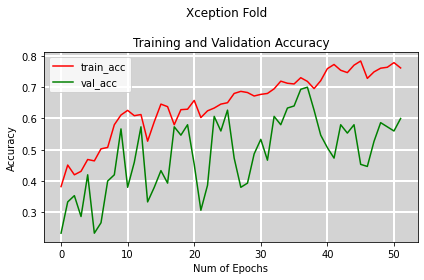

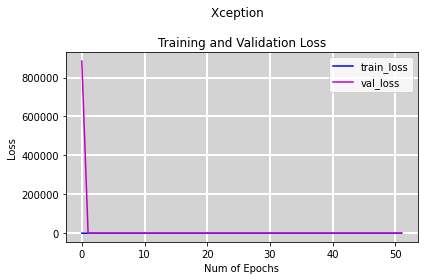

(1350, 256, 256, 3)
(1350,)
Epoch 1/80
43/43 [==============================] - 27s 517ms/step - loss: 1.4555 - accuracy: 0.4711 - val_loss: 4528.2534 - val_accuracy: 0.3333
Epoch 2/80
43/43 [==============================] - 21s 497ms/step - loss: 0.9665 - accuracy: 0.5393 - val_loss: 1.3909 - val_accuracy: 0.3333
Epoch 3/80
43/43 [==============================] - 21s 495ms/step - loss: 0.8355 - accuracy: 0.5726 - val_loss: 1.2987 - val_accuracy: 0.3067
Epoch 4/80
43/43 [==============================] - 21s 497ms/step - loss: 0.8387 - accuracy: 0.5911 - val_loss: 1.1399 - val_accuracy: 0.3333
Epoch 5/80
43/43 [==============================] - 21s 497ms/step - loss: 0.8003 - accuracy: 0.6030 - val_loss: 1.4319 - val_accuracy: 0.3333
Epoch 6/80
43/43 [==============================] - 21s 496ms/step - loss: 0.7796 - accuracy: 0.6489 - val_loss: 1.2450 - val_accuracy: 0.3400
Epoch 7/80
43/43 [==============================] - 21s 498ms/step - loss: 0.7293 - accuracy: 0.6637 - val_loss

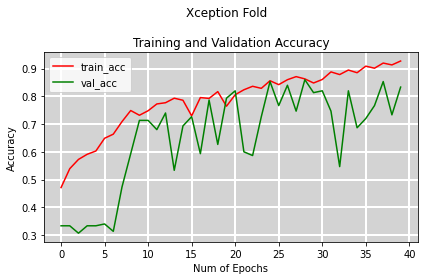

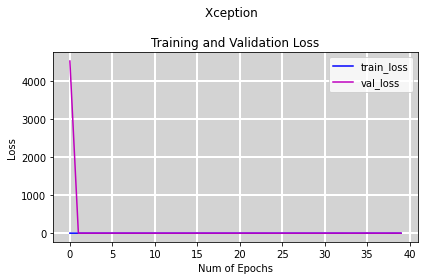

(1350, 256, 256, 3)
(1350,)
Epoch 1/80
43/43 [==============================] - 26s 518ms/step - loss: 1.9163 - accuracy: 0.3763 - val_loss: 326386.5312 - val_accuracy: 0.4200
Epoch 2/80
43/43 [==============================] - 21s 498ms/step - loss: 1.1406 - accuracy: 0.4415 - val_loss: 7802.3057 - val_accuracy: 0.2400
Epoch 3/80
43/43 [==============================] - 21s 497ms/step - loss: 0.9826 - accuracy: 0.5363 - val_loss: 49.9005 - val_accuracy: 0.3067
Epoch 4/80
43/43 [==============================] - 21s 496ms/step - loss: 0.8642 - accuracy: 0.5763 - val_loss: 4.6416 - val_accuracy: 0.3333
Epoch 5/80
43/43 [==============================] - 21s 497ms/step - loss: 0.8795 - accuracy: 0.5763 - val_loss: 1.0458 - val_accuracy: 0.3867
Epoch 6/80
43/43 [==============================] - 21s 496ms/step - loss: 0.7903 - accuracy: 0.6015 - val_loss: 0.9492 - val_accuracy: 0.5533
Epoch 7/80
43/43 [==============================] - 21s 494ms/step - loss: 0.7369 - accuracy: 0.6444 - va

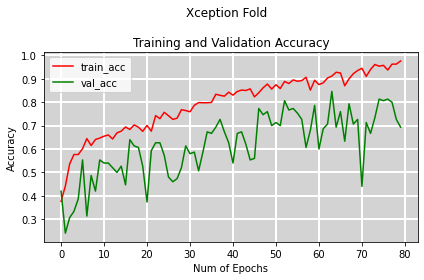

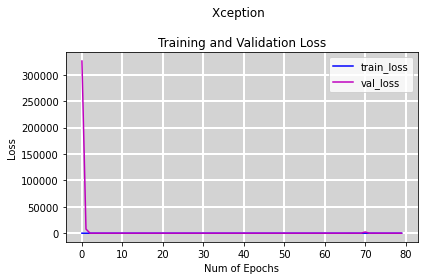

(1350, 256, 256, 3)
(1350,)
Epoch 1/80
43/43 [==============================] - 26s 519ms/step - loss: 1.7409 - accuracy: 0.4015 - val_loss: 91135.9766 - val_accuracy: 0.3333
Epoch 2/80
43/43 [==============================] - 21s 497ms/step - loss: 1.0478 - accuracy: 0.4926 - val_loss: 2049.6968 - val_accuracy: 0.3333
Epoch 3/80
43/43 [==============================] - 21s 496ms/step - loss: 1.0098 - accuracy: 0.5326 - val_loss: 71.2481 - val_accuracy: 0.3600
Epoch 4/80
43/43 [==============================] - 21s 496ms/step - loss: 0.9213 - accuracy: 0.5519 - val_loss: 1.4365 - val_accuracy: 0.4000
Epoch 5/80
43/43 [==============================] - 21s 496ms/step - loss: 0.9380 - accuracy: 0.5563 - val_loss: 1.0417 - val_accuracy: 0.5000
Epoch 6/80
43/43 [==============================] - 21s 495ms/step - loss: 0.8209 - accuracy: 0.6185 - val_loss: 1.5184 - val_accuracy: 0.4533
Epoch 7/80
43/43 [==============================] - 21s 496ms/step - loss: 0.8210 - accuracy: 0.6185 - val

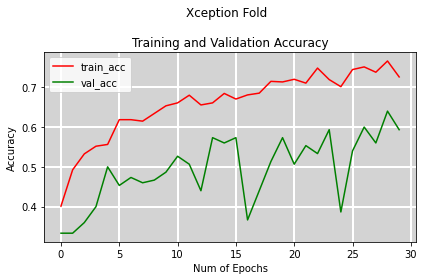

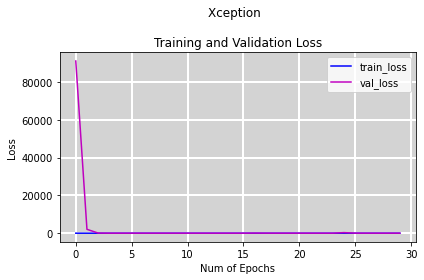

(1350, 256, 256, 3)
(1350,)
Epoch 1/80
43/43 [==============================] - 26s 518ms/step - loss: 1.9617 - accuracy: 0.3541 - val_loss: 105.3939 - val_accuracy: 0.3333
Epoch 2/80
43/43 [==============================] - 21s 497ms/step - loss: 1.2251 - accuracy: 0.3889 - val_loss: 1.4888 - val_accuracy: 0.2867
Epoch 3/80
43/43 [==============================] - 21s 499ms/step - loss: 1.0719 - accuracy: 0.4630 - val_loss: 1.4585 - val_accuracy: 0.2867
Epoch 4/80
43/43 [==============================] - 21s 499ms/step - loss: 0.9746 - accuracy: 0.5193 - val_loss: 2.0689 - val_accuracy: 0.2600
Epoch 5/80
43/43 [==============================] - 21s 500ms/step - loss: 0.9135 - accuracy: 0.5785 - val_loss: 1.1978 - val_accuracy: 0.4267
Epoch 6/80
43/43 [==============================] - 21s 498ms/step - loss: 0.8099 - accuracy: 0.6341 - val_loss: 1.2909 - val_accuracy: 0.3600
Epoch 7/80
43/43 [==============================] - 21s 497ms/step - loss: 0.7888 - accuracy: 0.6526 - val_loss:

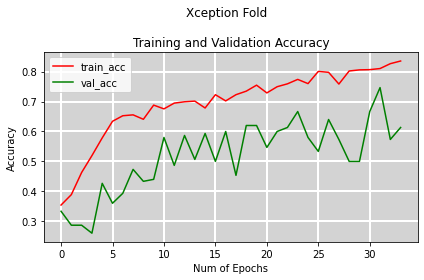

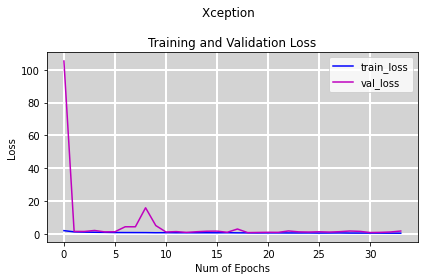

> Global accuracy: 0.7040000000000001 0.10315899271405173
> Global F1_Score:  0.6936542432772937 0.11460859826896232
> Global Precision: 0.7450445126454214 0.09012386196894294
> Global Recall:  0.7040000000000001 0.10315899271405173
Acuracia [0.5533333333333333, 0.84, 0.7466666666666667, 0.82, 0.7466666666666667, 0.6, 0.8333333333333334, 0.6933333333333334, 0.5933333333333334, 0.6133333333333333]
F1 Score [0.49952309832549346, 0.8344648842599725, 0.750755857898715, 0.8189661593215357, 0.7488317207789154, 0.6081684661695484, 0.8307683140212028, 0.6819107517220724, 0.5664149864149863, 0.596738193860496]
Precision [0.809116809116809, 0.8616938616938618, 0.7668010752688171, 0.825364867530077, 0.7586344321861068, 0.6302891237101763, 0.8474502827951103, 0.6901727357609712, 0.5887719298245614, 0.6721500085677218]
Recall [0.5533333333333333, 0.84, 0.7466666666666667, 0.82, 0.7466666666666667, 0.6, 0.8333333333333334, 0.6933333333333334, 0.5933333333333334, 0.6133333333333333]


In [7]:
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=29)
indice = 0

for train, test in kf.split(imagens, labels):
    imgs_train, imgs_val = imagens[train], imagens[test]
    labs_train, labs_val = labels[train], labels[test]
    
    print(imgs_train.shape)
    print(labs_train.shape)
    
    #This will stop the training if the loss dosent improve for 8 epoch
    earlstop = EarlyStopping(monitor='val_loss', patience=15,  verbose=0)

    model = tf.keras.applications.xception.Xception( weights=None,
                                                    input_shape=(IMAGE_SIZE, IMAGE_SIZE,3), classes=3, classifier_activation='softmax')
    #Compilar modelo

    # model.summary()
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
    xcept = model.fit(imgs_train, labs_train,batch_size=batchsize,validation_data=(imgs_val, labs_val), verbose=1,epochs=epoch, callbacks=[earlstop])
    
    print(imgs_val.shape)
    print(labs_val.shape)

    labs_predict = model.predict(imgs_val)
    labs_predict = np.argmax(labs_predict, axis=1)

    accuracy = metrics.accuracy_score(labs_val, labs_predict)
    acc_folds.append(accuracy)

    f1 = metrics.f1_score(labs_val, labs_predict, average="macro")
    f1_folds.append(f1)

    precision = metrics.precision_score(labs_val, labs_predict, average="macro")
    prec_folds.append(precision)

    recall = metrics.recall_score(labs_val, labs_predict, average="macro")
    recall_folds.append(recall)

    print('Acurracy: %f' % accuracy)
    print('F1: %f' % f1)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)

    print("==========================================================================")
    plt.figure(0)
    plt.plot(xcept.history['accuracy'], 'r', label="train_acc")
    plt.plot(xcept.history['val_accuracy'], 'g', label="val_acc")
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.yscale('linear')
    plt.xscale('linear')
    plt.title("Xception Fold  \n \n"
                  "Training and Validation Accuracy")
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.grid(True, color='w', linestyle='-', linewidth=2)
    plt.gca().patch.set_facecolor('lightgrey')
    plt.legend()
    # plt.savefig(str(output) + '/XceptionAcc.png')
    plt.show()
    plt.close()

    plt.figure(1)
        
    plt.plot(xcept.history['loss'], 'b', label="train_loss")
    plt.plot(xcept.history['val_loss'], 'm', label="val_loss")
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.yscale('linear')
    plt.xscale('linear')
    plt.title("Xception  \n \n"
                  "Training and Validation Loss")
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.grid(True, color='w', linestyle='-', linewidth=2)
    plt.gca().patch.set_facecolor('lightgrey')
    plt.legend()
    # plt.savefig(str(output) + '/XceptionLoss.png')
    plt.show()
    
    hist_df = pd.DataFrame(xcept.history)
    hist_csv_file = '/kaggle/working/Xceptionhistory_' + str(indice) + '.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
    
    indice += 1
    
    model = None
    imgs_train = None
    labs_train = None
    imgs_val = None
    labs_val = None


print("===================================================================")
print(f'> Global accuracy: {np.mean(acc_folds)} {np.std(acc_folds)}')
print(f'> Global F1_Score:  {np.mean(f1_folds)} {np.std(f1_folds)}')
print(f'> Global Precision: {np.mean(prec_folds)} {np.std(prec_folds)}')
print(f'> Global Recall:  {np.mean(recall_folds)} {np.std(recall_folds)}')
print("===================================================================")

print("Acuracia", acc_folds)
print("===================================================================")
print("F1 Score", f1_folds)
print("===================================================================")
print("Precision", prec_folds)
print("===================================================================")
print("Recall", recall_folds)

# # **Model Test on Test Set**

Se quiser ver o desempenho do modelo no test set deve
1. Train o modelo em todo training set( sem usar K-fold cross validation dessa vez)
2. Testar o teu modelo no test set
3. O Desempenho do teu modelo deve estar dentro do intervalo de confia definido pelo K-fold

In [8]:
# model = tf.keras.applications.xception.Xception( weights=None,
#                                                 input_shape=(IMAGE_SIZE, IMAGE_SIZE,3), classes=3, classifier_activation='softmax')

# #Compilar modelo

# # model.summary()

# model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# xcept = model.fit(imagens, labels,batch_size=batchsize, verbose=1,epochs=epoch)

In [9]:
# #Load Test data

# imgs_test, labs_test = load_data(test_data)
# print(imgs_test.shape)
# print(labs_test.shape)

# labs_predict = model.predict(imgs_test)
# labs_predict = np.argmax(labs_predict, axis=1)

# accuracy = metrics.accuracy_score(labs_test, labs_predict)
# f1 = metrics.f1_score(labs_test, labs_predict, average="macro")
# precision = metrics.precision_score(labs_test, labs_predict, average="macro")
# recall = metrics.recall_score(labs_test, labs_predict, average="macro")

# print('Acurracy: %f' % accuracy)
# print('F1: %f' % f1)
# print('Precision: %f' % precision)
# print('Recall: %f' % recall)